In [1]:
from multiplot import feature_plot
from collections import OrderedDict

import pickle
import os

import matplotlib.pyplot as plt
%matplotlib inline

font = {'weight' : 'bold',
        'size'   : 18}

import matplotlib
matplotlib.rc('font', **font)

cols = ['#000000','#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#a65628','#f781bf','#ffd700', '#00ced1']


## X=Dataset,  Y= Count, Single Atlas

['KKI2009', 'MRN114', 'MRN1313', 'SWU4', 'BNU1', 'BNU3', 'NKI1', 'NKIENH', 'HNU1', 'Jung2015']


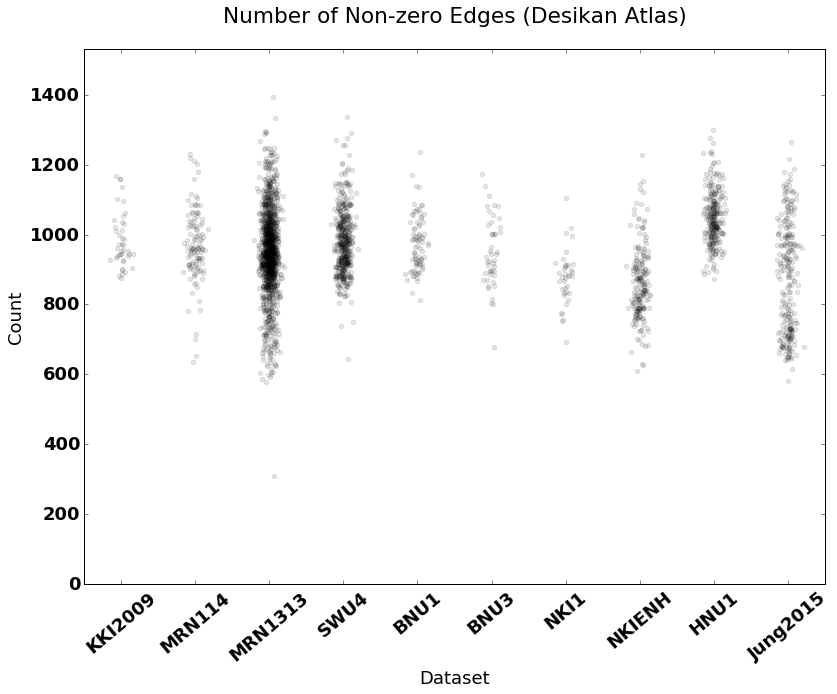

In [2]:
f_nnz = open('../../data/graphs/desikan/desikan_nnz.pkl')

nnz = pickle.load(f_nnz)['nnz']
f_nnz.close()
dnames = nnz.keys()
print dnames

plt_nnz = feature_plot(nnz, dnames, 'Number of Non-zero Edges (Desikan Atlas)', plot_mode='scatter',
                       fig_outfile='../../figs/graphs/multiscale_qc/desikan_nnz_datasets.png')

## X=Atlas,  Y= Count, Single Dataset

['JHU', 'Desikan', 'DS00071', 'DS00096', 'DS00108', 'HarvardOxford', 'AAL', 'DS00140', 'DS00195', 'CPAC200', 'DS00278', 'DS00350', 'DS00446', 'DS00583', 'Talairach']


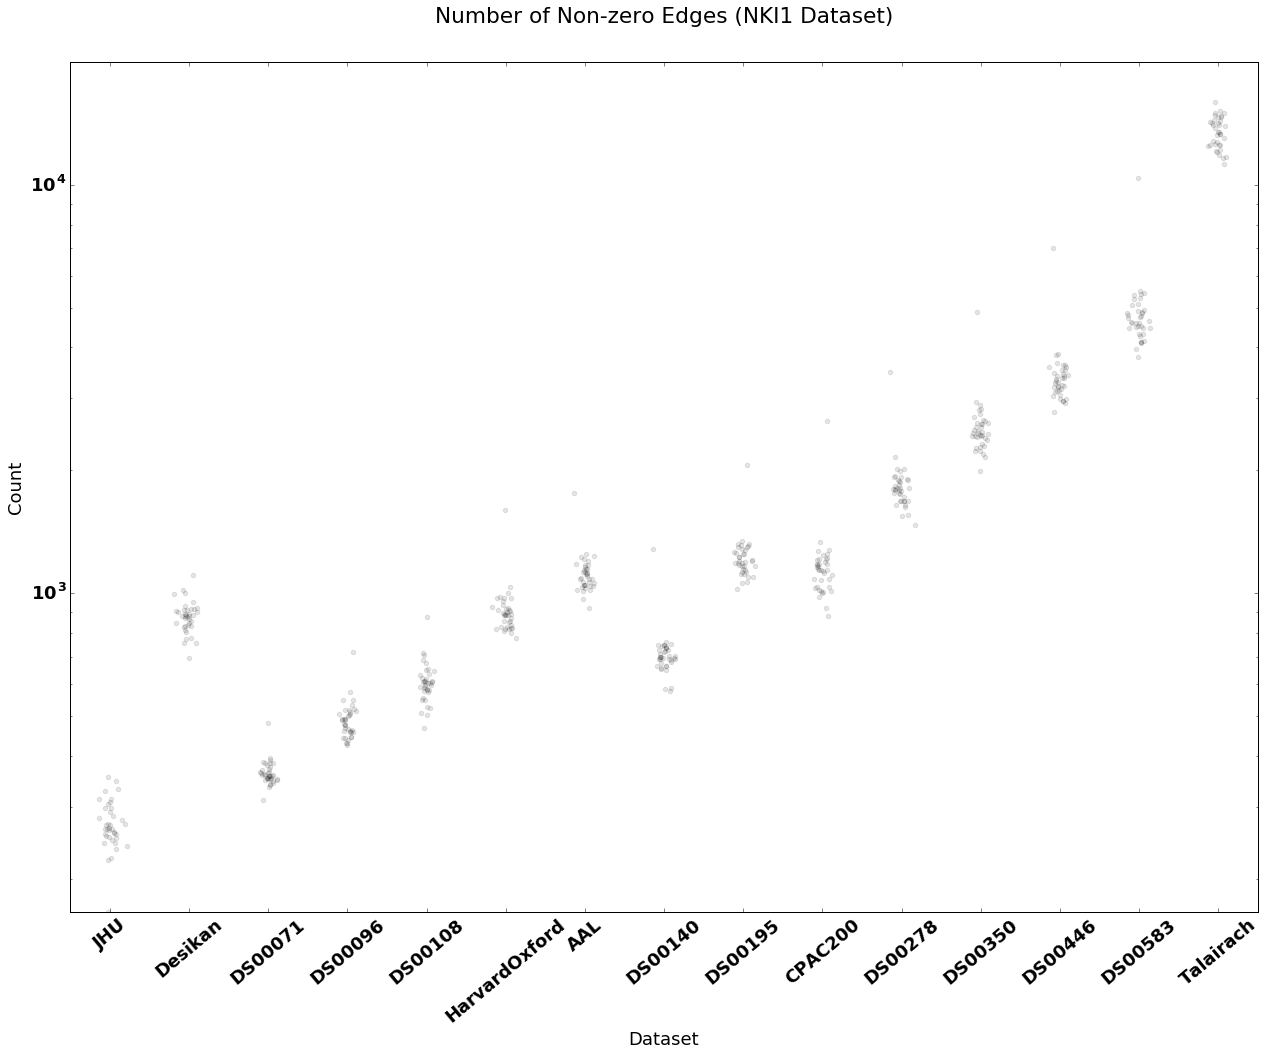

In [3]:
basedir = '/Users/gkiar/code/ocp/dataset_variance/data/graphs/'
atlases = (('JHU', 48),
           ('desikan', 70),
           ('DS00071', 70),
           ('DS00096', 95),
           ('DS00108', 107),
           ('HarvardOxford', 111),
           ('AAL', 116),
           ('DS00140', 139),
           ('DS00195', 194),
           ('CPAC200', 200),
           ('DS00278', 277),
           ('DS00350', 349),
           ('DS00446', 445),
           ('DS00583', 582),
           ('Talairach', 1105))
atlases = OrderedDict(atlases)
dset = 'NKI1'
dnames = list()
nnz = OrderedDict()
for atlas in atlases:
    temp_path = os.path.join(basedir, atlas, atlas + '_nnz.pkl')
    f_nnz = open(temp_path)
    temp_nnz = pickle.load(f_nnz)['nnz']
    f_nnz.close()
    nnz[atlas] = temp_nnz['NKI1']
    dnames += [atlas.title()] if atlas == 'desikan' else [atlas]
print dnames

plt_nnz = feature_plot(nnz, dnames, 'Number of Non-zero Edges (NKI1 Dataset)', plot_mode='scatter',
                       fig_outfile='../../figs/graphs/multiscale_qc/desikan_nnz_atlases.png', ylims=[0, 20000],
                       axis_scale='log')

## Multiplot; 1 Dataset, 1 Atlas, all metrics

['eigs', 'degree', 'ss1', 'nnz', 'centrality', 'ccoefs', 'edgeweight']


<ndmg.stats.plot_metrics.plot_metrics instance at 0x112a6ee60>

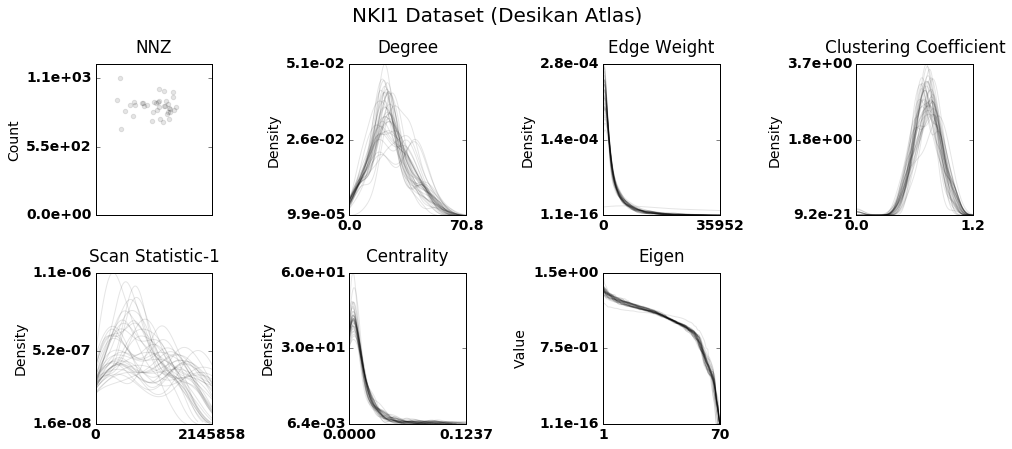

In [5]:
from ndmg.stats import plot_metrics

dset = 'NKI1'
atlas = 'desikan'

metrics = {'ccoefs.pkl': 'Clustering Coefficient Distribution',
           'centrality.pkl': 'Betweenness Centrality Distribution',
           'degree.pkl': 'Degree Distribution',
           'edgeweight.pkl': 'Edge Weight Distribution',
           'eigs.pkl': 'Eigen Value Sequence',
           'nnz.pkl': 'Number of Non-Zero Edges',
           'ss1.pkl': 'Scan Statistic-1 Distribution'}

s = OrderedDict()
for metric in metrics:
    temp_path = os.path.join(basedir, atlas, atlas + '_' + metric)
    f = open(temp_path)
    temp = pickle.load(f)[os.path.splitext(metric)[0]]
    f.close()
    s[os.path.splitext(metric)[0]] = temp['NKI1']
print s.keys()

plot_metrics(s['nnz'], s['degree'], s['edgeweight'], s['ccoefs'], s['ss1'], s['eigs'],
             s['centrality'], '../../figs/graphs/multiscale_qc/desikan_nnz_metrics.png', 'NKI1 Dataset (Desikan Atlas)')